In [1]:
from leicaautomator.automator import find_spots
from leicaautomator.utils import save_regions, flatten
from leicaexperiment import Experiment
from leicascanningtemplate import ScanningTemplate
from leicacam import CAM

In [7]:
cam = CAM()
cam.welcome_msg

b'Welcome client : 6\n'

In [5]:
tmpl_path = r"C:\Users\TCS-User\AppData\Roaming\Leica Microsystems\LAS X\MatrixScreener\ScanningTemplates\ ".strip()
tmpl_path

'C:\\Users\\TCS-User\\AppData\\Roaming\\Leica Microsystems\\LAS X\\MatrixScreener\\ScanningTemplates\\'

In [42]:
tmpl_name = '{ScanningTemplate}leicaautomator-overview.xml'
tmpl = ScanningTemplate(tmpl_path + tmpl_name)

In [43]:
tmpl.properties.attrib

{'TotalAssignedJobs': '228', 'TotalCountOfFields': '228', 'Version': 'Version: 1.0.4.661 -- Build 29.09.2014', 'UniqueJobCounter': '1', 'TotalCountOfWells': '1'}

In [44]:
tmpl.properties.CountOfScanFieldsX = 20
tmpl.properties.CountOfScanFieldsY = 12

In [45]:
tmpl.add_well(1, 2, 55225e-6, 29525e-6)

In [46]:
tmpl.remove_well(1,1)

In [58]:
tmpl.well_array.ScanWellData.attrib['WellY'] = '1'
for f in tmpl.fields:
    f.attrib['WellY'] = '1'

In [60]:
tmpl.write()

In [67]:
cam.load_template('{ScanningTemplate}leicaautomator0') # fake load

[]

In [68]:
cam.load_template(tmpl.filename)

[]

In [8]:
cam.start_scan()

[]

In [37]:
from time import sleep
scanfinished = False
while not scanfinished:
    msg = cam.receive()
    for cmd in msg:
        try:
            if cmd['inf'] == 'scanfinished':
                scanfinished = True
                break
        except KeyError:
            continue
    sleep(10e-3)

**NOTE**

- hour off by one
- seconds not allways correct in GUI

In [38]:
exp_path = r"D:\MatrixScreenerImages\3.3.0_9757\ ".strip()
exp_path

'D:\\MatrixScreenerImages\\3.3.0_9757\\'

In [39]:
whole = 'experiment--2015_03_21_15_02_11'
experiment = Experiment(exp_path + whole)
!dir $experiment.path

 Volume in drive D is DATADRIVE1
 Volume Serial Number is F805-2E08

 Directory of D:\MatrixScreenerImages\3.3.0_9757\experiment--2015_03_21_15_02_11

03/21/2015  04:02 PM    <DIR>          .
03/21/2015  04:02 PM    <DIR>          ..
03/21/2015  04:02 PM    <DIR>          AdditionalData
03/21/2015  04:02 PM    <DIR>          slide--S00
               0 File(s)              0 bytes
               4 Dir(s)  1,700,173,557,760 bytes free


In [40]:
compressed = experiment.compress(delete_tif=True)

In [41]:
len(experiment.images), len(compressed)

(240, 240)

In [42]:
from PIL import Image
for img in experiment.images:
    i = Image.open(img)
    i = i.rotate(270)
    i.save(img)

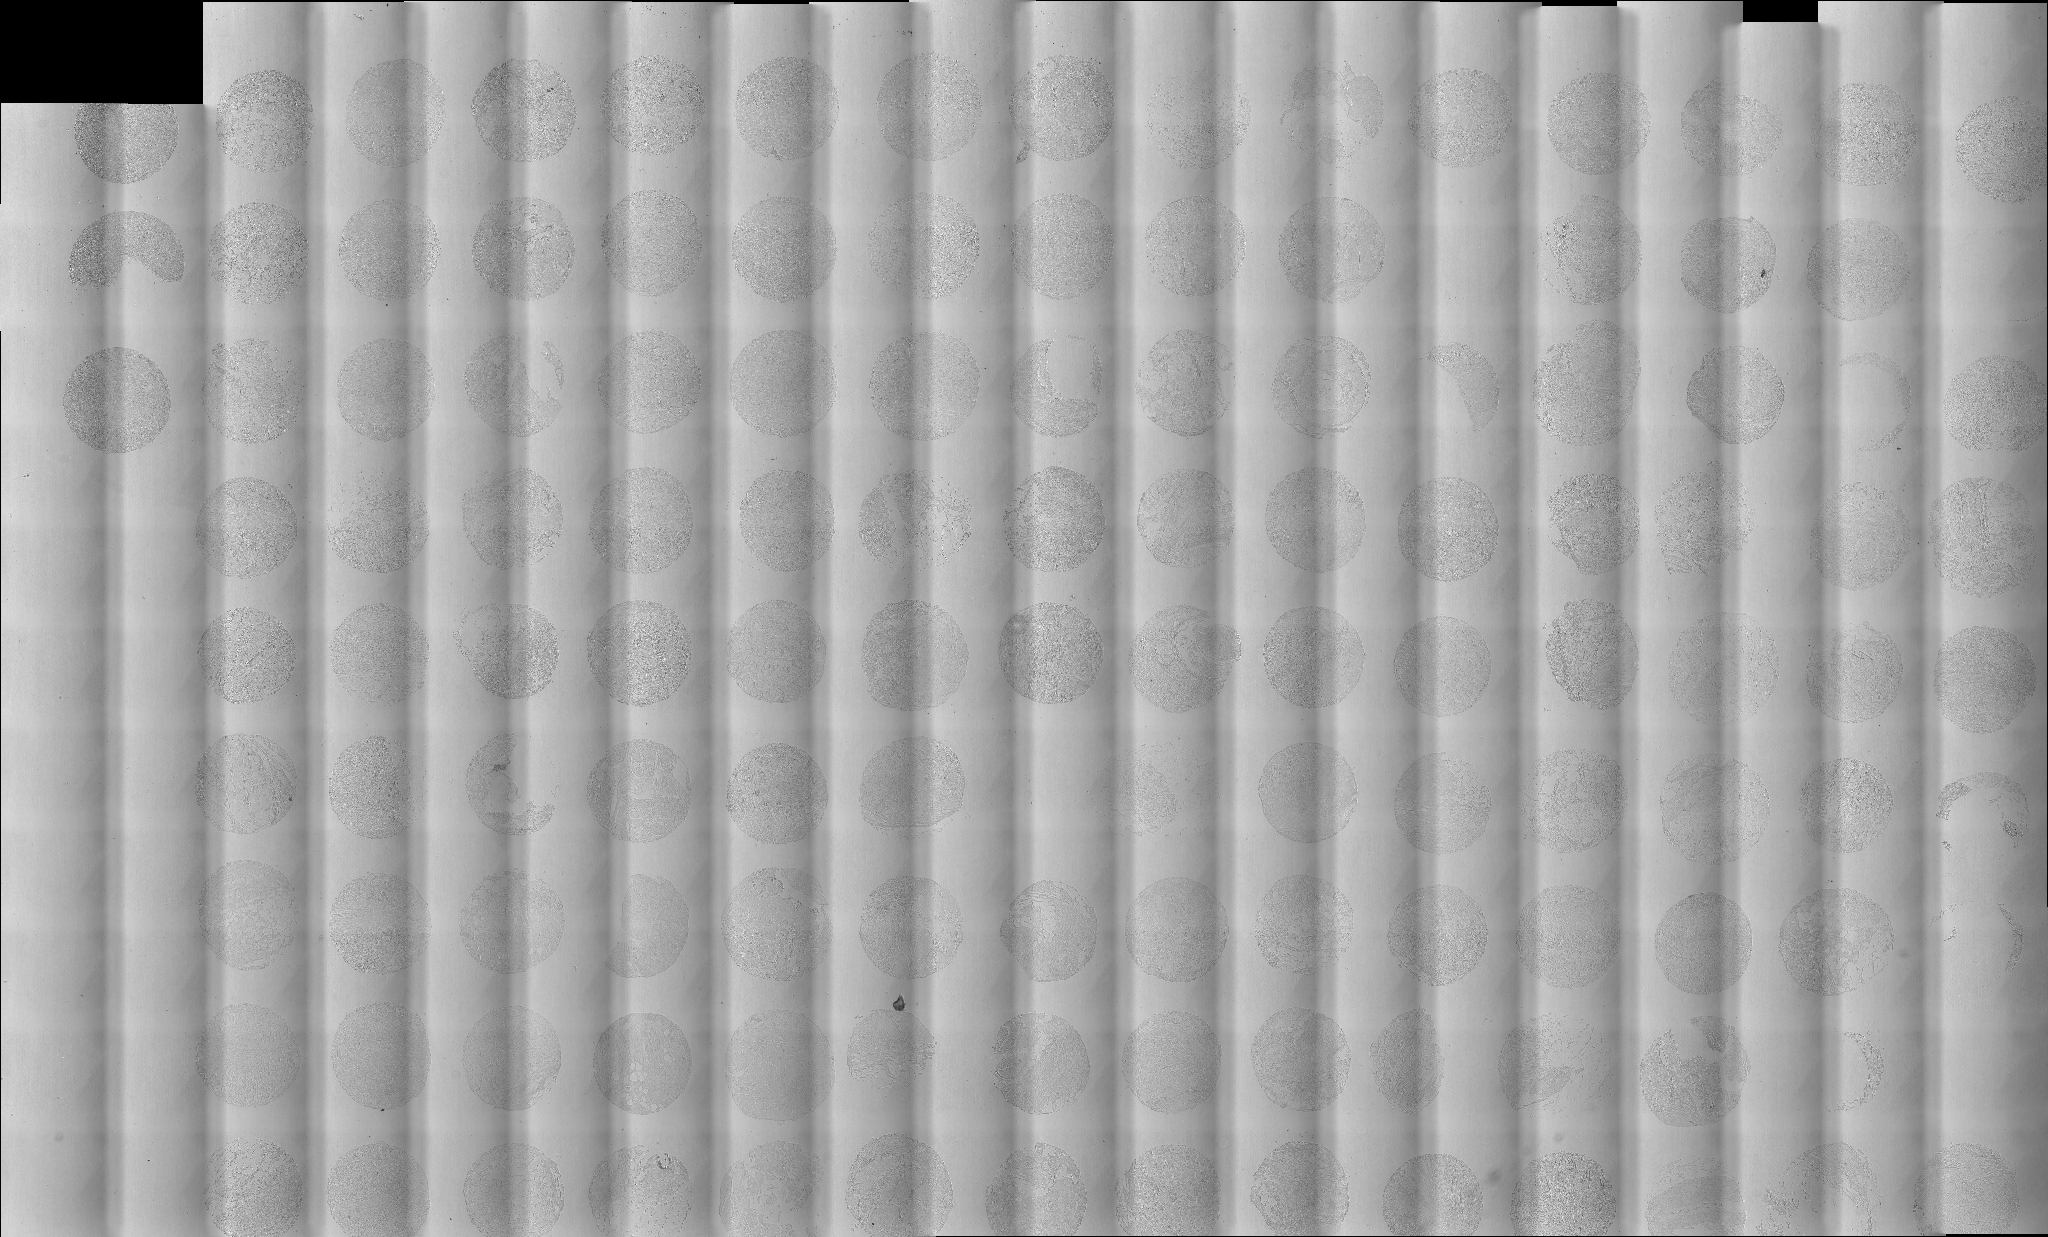

In [43]:
stitched = experiment.stitch()[0]
from IPython import display
display.Image(stitched)

In [44]:
regions = find_spots(experiment)

IndexError: index 4115 is out of bounds for axis 1 with size 4115

IndexError: index 4115 is out of bounds for axis 1 with size 4115

IndexError: index 4115 is out of bounds for axis 1 with size 4115

IndexError: index 4115 is out of bounds for axis 1 with size 4115

AttributeError: '_RegionProperties' object has no attribute 'x'